> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigating The "No Show Appointments" Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 
    In this project, I will be analyzing a dataset that collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about each patient are included in each row of this dataset. So, I will try to find out the factors that are most related to the     presence/ absence of patients using this analytical project.

### Some questions that I need to answer are:

1.\n
2.\n
3.\n
4.\n


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [119]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("no_show.csv")

In [120]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [121]:
df.shape

(110527, 14)

In [122]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This dataset has precisely 110527 entries (with no duplicates nor empty cells), and 14 columns including the patients ID, gender, age, neighbourhood, hypertension, diabetes and others.

There are some errors though that must be cleaned, for example the minimum age is -1 which ,obviously, doesn't make sense.

Now, I will make some changes to the column names, firstly for consistency

In [29]:
#df.columns= df.columns.str.lower()
#df.columns


Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [124]:
df.rename( columns = {'Hipertension':'Hypertension','Handcap': 'Handicapped','No-show':'No_show'},inplace=True )

In [125]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [126]:
#Will drop some unnecessary columns
df.drop(['PatientId','AppointmentID','ScheduledDay','Scholarship'],axis=1,inplace=True)
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,1,1,0,0,0,No


In [86]:
#df.iloc[99832]['Age']-1

-1

In [127]:
df.index[df['Age'] == -1]

Int64Index([99832], dtype='int64')

In [92]:
#df.iloc[99832]

PatientId            465943158731293.0
Gender                               F
AppointmentDay    2016-06-06T00:00:00Z
Age                                 -1
Neighbourhood                    ROMÃO
Hypertension                         0
Diabetes                             0
Alcoholism                           0
Handicapped                          0
SMS_received                         0
No-show                             No
Name: 99832, dtype: object

In [128]:
df.drop([99832],inplace=True)
df.describe()

,Age,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [117]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#rename misspelled columns

#df.rename( columns = {'Hipertension':'Hypertension','Handcap': 'Handicapped','No-show':'No_show'},inplace=True )


In [105]:
#Will drop some unnecessary columns

#df.drop(['AppointmentID','ScheduledDay','Scholarship'],axis=1,inplace=True)


KeyError: "['AppointmentID' 'ScheduledDay' 'Scholarship'] not found in axis"

In [98]:
#find the rows with age -1 to delete

#df.index[df['Age'] == -1]

Int64Index([], dtype='int64')

In [99]:
#drop it and make sure the means are correct
#df.drop([99832],inplace=True)
#df.describe()

KeyError: '[99832] not found in axis'

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [71]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [160]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [177]:
df['Day_of_Week'] = pd.to_datetime((df['AppointmentDay'],format='%y-%m-%d hhmmss').dt.weekday_name
#df['Date'] = df['AppointmentDay'].dt.strftime('%m-%d-%Y')

SyntaxError: invalid syntax (<ipython-input-177-885c8b1443c1>, line 1)

In [135]:
Show= df[df['No_show']== 'No']
Noshow= df[df['No_show']== 'Yes']

In [158]:
Show.describe()

,Age,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received
count,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000
mean,37.790504,0.204394,0.073838,0.030417,0.022742,0.291337
std,23.338645,0.403261,0.261508,0.171733,0.162751,0.454381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [161]:
#Noshow.mean()

In [157]:
Noshow.describe()

,Age,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,34.317667,0.169004,0.064071,0.030333,0.020297,0.438371
std,21.965941,0.374764,0.244885,0.171505,0.156670,0.496198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,4.000000,1.000000


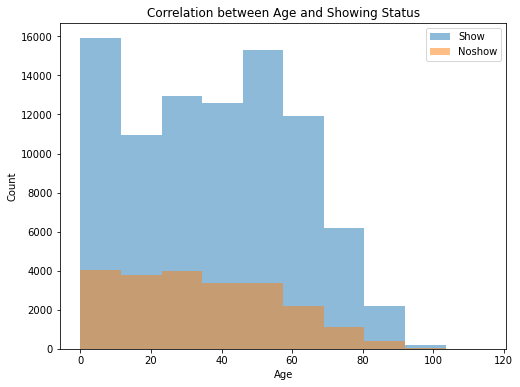

In [162]:

#age vs show/noshow
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(Show['Age'], alpha =0.5, label = 'Show')
ax.hist(Noshow['Age'], alpha =0.5, label = 'Noshow')
ax.set_title('Correlation between Age and Showing Status')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

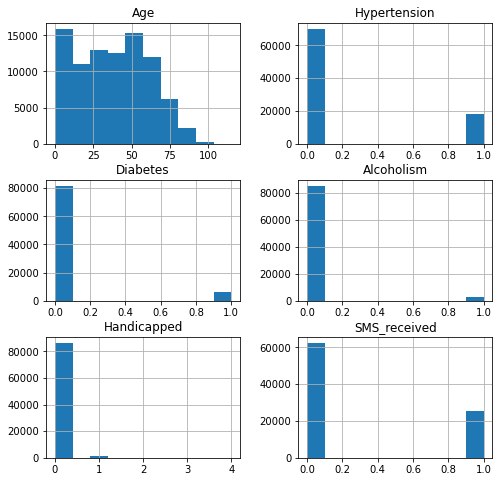

In [166]:
Show.hist(figsize=(8,8));

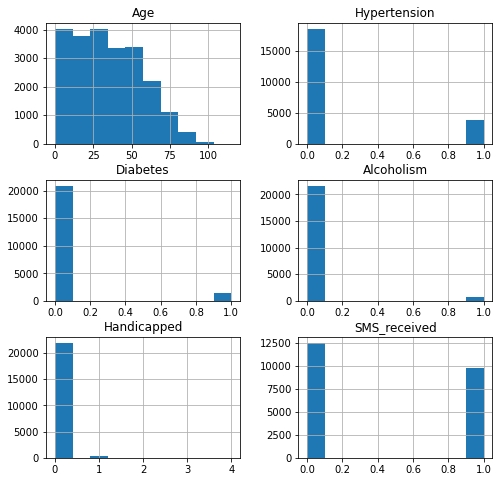

In [171]:
Noshow.hist(figsize=(8,8));

In [195]:
#Show.groupby('AppointmentDay').mean()

In [194]:
#Noshow.groupby('Age').mean().plot(kind='bar')

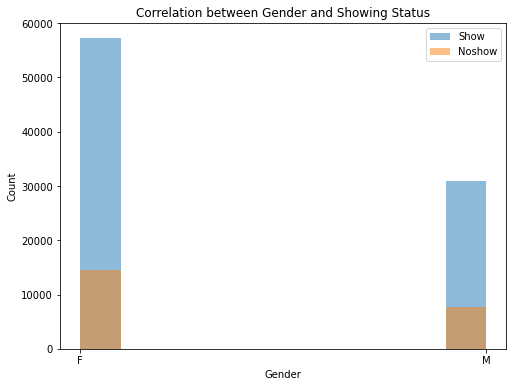

In [196]:
#gender vs show/noshow

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(Show['Gender'], alpha =0.5, label = 'Show')
ax.hist(Noshow['Gender'], alpha =0.5, label = 'Noshow')
ax.set_title('Correlation between Gender and Showing Status')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

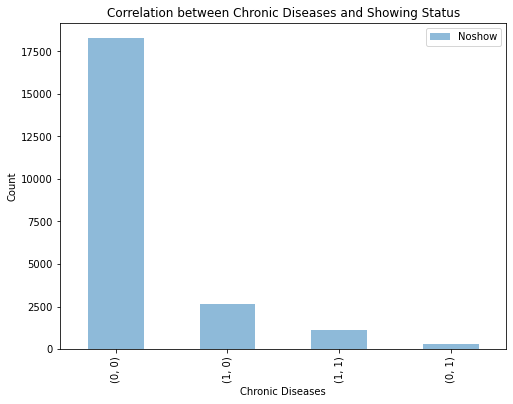

In [243]:
#Chronic Disease Vs Show,Noshow

fig, ax = plt.subplots(figsize=(8, 6))
#Show[['Hypertension','Diabetes']].value_counts().plot(kind='bar', alpha =0.9, label = 'Show')
Noshow[['Hypertension','Diabetes']].value_counts().plot(kind='bar', alpha =0.5, label = 'Noshow')
plt.title('Correlation between Chronic Diseases and Showing Status')
plt.xlabel('Chronic Diseases')
plt.ylabel('Count')
plt.legend(loc='upper right');

In [231]:
Noshow[['Hypertension','Diabetes']].value_counts()

Hypertension  Diabetes
0             0           18258
1             0            2631
              1            1141
0             1             289
dtype: int64

In [245]:
Noshow.Age.mean(),Show.Age.mean()

(34.31766656212196, 37.790504154999034)

In [ ]:
#df.groupby('Hypertension')['No_show'].value_counts().plot(kind='bar');

In [ ]:
#df.groupby(['Hypertension','Diabetes']).Noshow.mean()

In [ ]:
df['AppointmentDay'] = df['AppointmentDay'].astype(str).astype('datetime64')

<a id='conclusions'></a>
## Conclusions
>is there a relation between gender and presence/absence of patients
>relation of age to the status of show/no show
>relation of chronic diseases and/or disabilities
>does sending an sms prevent absence
>relation of neighbourhood to the status of show/no show



> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

In [102]:
df_show = df[No_show]

0         62
1         56
2         62
3          8
4         56
          ..
110522    56
110523    51
110524    21
110525    38
110526    54
Name: Age, Length: 110526, dtype: int64